# 처음부터 끝까지 곧바로 실행하시면 됩니다.

## 라이브러리

In [1]:
pip freeze

absl-py==0.10.0
alembic==1.4.1
argon2-cffi==20.1.0
asn1crypto==0.24.0
astunparse==1.6.3
async-generator==1.10
attrs==20.3.0
backcall==0.2.0
beautifulsoup4==4.6.0
bleach==3.3.0
blis==0.7.4
Boruta==0.3
cachetools==4.2.0
catalogue==1.0.0
catboost==0.24.4
certifi==2020.12.5
cffi==1.14.5
chardet==4.0.0
click==7.1.2
cloudpickle==1.6.0
colorama==0.4.4
colorlover==0.3.0
confuse==1.4.0
cryptography==2.1.4
cufflinks==0.17.3
cycler==0.10.0
cymem==2.0.5
databricks-cli==0.14.2
dataclasses==0.8
decorator==4.4.2
defusedxml==0.6.0
dill==0.3.3
docker==4.4.4
entrypoints==0.3
et-xmlfile==1.0.1
filelock==3.4.1
Flask==1.1.2
flatbuffers==1.12
funcy==1.15
future==0.18.2
gast==0.3.3
gaussian==0.1
gdown==4.4.0
gensim==3.8.3
gitdb==4.0.5
GitPython==3.1.13
google-auth==1.24.0
google-auth-oauthlib==0.4.2
google-pasta==0.2.0
googleapis-common-protos==1.53.0
graphviz==0.16
grpcio==1.32.0
gunicorn==20.0.4
h5py==2.10.0
htmlmin==0.1.12
hyperopt==0.2.5
idna==2.6
ImageHash==4.2.0
imbalanced-learn==0.7.0
importlib-metada

In [2]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -r requirements.txt

  Cloning https://github.com/haven-jeon/PyKoSpacing.git (to revision 1a36be492cc396559e7dce7825843af020ea231f) to /tmp/pip-install-3d0ukjjt/pykospacing_b35d7768773246b9b4c88fa39830045a
  Running command git clone --filter=blob:none -q https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-install-3d0ukjjt/pykospacing_b35d7768773246b9b4c88fa39830045a
  Running command git rev-parse -q --verify 'sha^1a36be492cc396559e7dce7825843af020ea231f'
  Running command git fetch -q https://github.com/haven-jeon/PyKoSpacing.git 1a36be492cc396559e7dce7825843af020ea231f
  Running command git checkout -q 1a36be492cc396559e7dce7825843af020ea231f
  Resolved https://github.com/haven-jeon/PyKoSpacing.git to commit 1a36be492cc396559e7dce7825843af020ea231f
  Preparing metadata (setup.py) ... done
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
!nvidia-smi

Sat Apr  9 20:33:18 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.73.01    Driver Version: 460.73.01    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:00:05.0 Off |                  Off |
| N/A   31C    P0    39W / 300W |      0MiB / 32510MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15276642937648897868
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 31592913408
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6753555642149719865
physical_device_desc: "device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:00:05.0, compute capability: 7.0"
]


In [6]:
%matplotlib inline
import numpy as np 
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import Model

## 데이터 세트 다운로드, 압축 해제

In [7]:
!pip install gdown

# train 데이터 세트_ClsKLData
!gdown --id "1TOHms3kqGonSayOTse0MXiOc4zGSdtsI"

# validation & test 데이터 세트_KneeXray
!gdown --id "1lR_B5LSrtUg273ADJQswDHxpjzDfFxIR"

# 추가 test 데이터 세트_Lee_kneeData
!gdown --id "1pI08Cs48tp9NXhuRMt7tssITx4-_PqH1"

/usr/local/lib/python3.6/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1TOHms3kqGonSayOTse0MXiOc4zGSdtsI
To: /home/ClsKLData.zip
100%|████████████████████████████████████████| 591M/591M [00:05<00:00, 98.8MB/s]
/usr/local/lib/python3.6/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1lR_B5LSrtUg273ADJQswDHxpjzDfFxIR
To: /home/KneeXray.zip
100%|████████████████████████████████████████| 120M/120M [00:01<00:00, 69.3MB/s]
/usr/local/lib/python3.6/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it

In [8]:
import zipfile
         
fantasy_zip = zipfile.ZipFile('./ClsKLData.zip')
fantasy_zip.extractall('./ClsKLData')
fantasy_zip.close()

In [9]:
import zipfile
fantasy_zip = zipfile.ZipFile('./KneeXray.zip')
fantasy_zip.extractall('./KneeXray') 
fantasy_zip.close()

In [10]:
import zipfile
fantasy_zip = zipfile.ZipFile('./Lee_KneeData.zip')
fantasy_zip.extractall('./Lee_KneeData')
fantasy_zip.close()

In [11]:
train_aug = ImageDataGenerator(rescale=1./255)
valid_aug = ImageDataGenerator(rescale=1./255)

## 학습 데이터

In [12]:
n_class = 5

root_path = "./ClsKLData//kneeKL224//"

folder_list = os.listdir(root_path)
image_path_list = []
label_list = []

for folder in folder_list:
    for label in range(n_class):
        image_list = os.listdir(f"{root_path}{folder}/{label}")
        image_path_list += [ f"{root_path}{folder}/{label}/"+ path for path in image_list]
        label_list += [label] * len(image_list)

df_train_kaggle = pd.DataFrame({"filepath" : image_path_list, "label": label_list})

In [13]:
df_train_kaggle.shape

(9786, 2)

## 학습 데이터 분포

Text(0, 0.5, 'count')

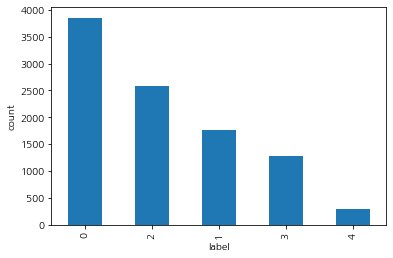

In [14]:
df_train_kaggle.label.value_counts().plot.bar()
plt.xlabel("label")
plt.ylabel("count")

In [15]:
train_generator = train_aug.flow_from_dataframe(
    dataframe = df_train_kaggle,
    directory = None,
    x_col="filepath",
    y_col="label",
    batch_size = 8,
    seed = 42,
    shuffle = True,
    class_mode = "raw",
    target_size = (224,224)
)

Found 9786 validated image filenames.


## 검증, 테스트 데이터

In [16]:
compi_root_path= "./KneeXray//KneeXray//"
df_val_compi = pd.read_csv(compi_root_path + "Train.csv")
df_val_compi["filename"] = df_val_compi.filename.apply(lambda x: compi_root_path+"train/" + x)
df_val_compi.head()

,filename,label
0,./KneeXray//KneeXray//train/Image_1.jpg,0
1,./KneeXray//KneeXray//train/Image_2.jpg,1
2,./KneeXray//KneeXray//train/Image_3.jpg,0
3,./KneeXray//KneeXray//train/Image_4.jpg,1
4,./KneeXray//KneeXray//train/Image_5.jpg,2


In [17]:
df_val_compi.shape

(7828, 2)

## 검증 데이터 분포

Text(0, 0.5, 'count')

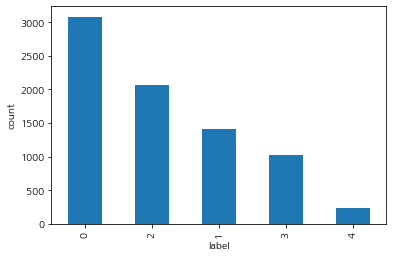

In [18]:
df_val_compi.label.value_counts().plot.bar()
plt.xlabel("label")
plt.ylabel("count")

In [19]:
valid_generator = valid_aug.flow_from_dataframe( 
    dataframe= df_val_compi,
    x_col = "filename",
    y_col = "label",
    batch_size = 8,
    seed = 42,
    shuffle = True,
    class_mode = "raw",
    target_size = (224,224)
)

Found 7828 validated image filenames.


## 모델 구조

In [20]:
from keras import backend as K
from keras_applications.imagenet_utils import _obtain_input_shape
from keras.models import Model
from keras.engine.topology import get_source_inputs
from keras.layers import Activation, Add, Concatenate, GlobalAveragePooling2D,GlobalMaxPooling2D, Input, Dense
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization, Lambda
# from keras.applications.mobilenet import DepthwiseConv2D
from tensorflow.keras import layers
import numpy as np


def ShuffleNet(include_top=True, input_tensor=None, scale_factor=1.0, pooling='max',
               input_shape=(224,224,3), groups=1, load_model=None, num_shuffle_units=[3, 7, 3],
               bottleneck_ratio=0.25, classes=1000):
    """
    ShuffleNet implementation for Keras 2
    ShuffleNet: An Extremely Efficient Convolutional Neural Network for Mobile Devices
    Xiangyu Zhang, Xinyu Zhou, Mengxiao Lin, Jian Sun
    https://arxiv.org/pdf/1707.01083.pdf
    Note that only TensorFlow is supported for now, therefore it only works
    with the data format `image_data_format='channels_last'` in your Keras
    config at `~/.keras/keras.json`.
    Parameters
    ----------
    include_top: bool(True)
         whether to include the fully-connected layer at the top of the network.
    input_tensor:
        optional Keras tensor (i.e. output of `layers.Input()`) to use as image input for the model.
    scale_factor:
        scales the number of output channels
    input_shape:
    pooling:
        Optional pooling mode for feature extraction
        when `include_top` is `False`.
        - `None` means that the output of the model
            will be the 4D tensor output of the
            last convolutional layer.
        - `avg` means that global average pooling
            will be applied to the output of the
            last convolutional layer, and thus
            the output of the model will be a
            2D tensor.
        - `max` means that global max pooling will
            be applied.
    groups: int
        number of groups per channel
    num_shuffle_units: list([3,7,3])
        number of stages (list length) and the number of shufflenet units in a
        stage beginning with stage 2 because stage 1 is fixed
        e.g. idx 0 contains 3 + 1 (first shuffle unit in each stage differs) shufflenet units for stage 2
        idx 1 contains 7 + 1 Shufflenet Units for stage 3 and
        idx 2 contains 3 + 1 Shufflenet Units
    bottleneck_ratio:
        bottleneck ratio implies the ratio of bottleneck channels to output channels.
        For example, bottleneck ratio = 1 : 4 means the output feature map is 4 times
        the width of the bottleneck feature map.
    classes: int(1000)
        number of classes to predict
    Returns
    -------
        A Keras model instance
    References
    ----------
    - [ShuffleNet: An Extremely Efficient Convolutional Neural Network for Mobile Devices]
      (http://www.arxiv.org/pdf/1707.01083.pdf)
    """

    if K.backend() != 'tensorflow':
        raise RuntimeError('Only TensorFlow backend is currently supported, '
                           'as other backends do not support ')

    name = "ShuffleNet_%.2gX_g%d_br_%.2g_%s" % (scale_factor, groups, bottleneck_ratio, "".join([str(x) for x in num_shuffle_units]))

    input_shape = _obtain_input_shape(input_shape,
                                      default_size=224,
                                      min_size=28,
                                      require_flatten=include_top,
                                      data_format=K.image_data_format())

    out_dim_stage_two = {1: 144, 2: 200, 3: 240, 4: 272, 8: 384}
    if groups not in out_dim_stage_two:
        raise ValueError("Invalid number of groups.")

    if pooling not in ['max','avg']:
        raise ValueError("Invalid value for pooling.")

    if not (float(scale_factor) * 4).is_integer():
        raise ValueError("Invalid value for scale_factor. Should be x over 4.")

    exp = np.insert(np.arange(0, len(num_shuffle_units), dtype=np.float32), 0, 0)
    out_channels_in_stage = 2 ** exp
    out_channels_in_stage *= out_dim_stage_two[groups]  # calculate output channels for each stage
    out_channels_in_stage[0] = 24  # first stage has always 24 output channels
    out_channels_in_stage *= scale_factor
    out_channels_in_stage = out_channels_in_stage.astype(int)

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    # create shufflenet architecture
    x = Conv2D(filters=out_channels_in_stage[0], kernel_size=(3, 3), padding='same',
               use_bias=False, strides=(2, 2), activation="relu", name="conv1")(img_input)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same', name="maxpool1")(x)

    # create stages containing shufflenet units beginning at stage 2
    for stage in range(0, len(num_shuffle_units)):
        repeat = num_shuffle_units[stage]
        x = _block(x, out_channels_in_stage, repeat=repeat,
                   bottleneck_ratio=bottleneck_ratio,
                   groups=groups, stage=stage + 2)

    if pooling == 'avg':
        x = GlobalAveragePooling2D(name="global_pool")(x)
    elif pooling == 'max':
        x = GlobalMaxPooling2D(name="global_pool")(x)

    if include_top:
        x = Dense(units=classes, name="fc")(x)
        x = Activation('softmax', name='softmax')(x)


    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input

    model = Model(inputs=inputs, outputs=x, name=name)

    if load_model is not None:
        model.load_weights('', by_name=True)

    return model


def _block(x, channel_map, bottleneck_ratio, repeat=1, groups=1, stage=1):
    """
    creates a bottleneck block containing `repeat + 1` shuffle units
    Parameters
    ----------
    x:
        Input tensor of with `channels_last` data format
    channel_map: list
        list containing the number of output channels for a stage
    repeat: int(1)
        number of repetitions for a shuffle unit with stride 1
    groups: int(1)
        number of groups per channel
    bottleneck_ratio: float
        bottleneck ratio implies the ratio of bottleneck channels to output channels.
        For example, bottleneck ratio = 1 : 4 means the output feature map is 4 times
        the width of the bottleneck feature map.
    stage: int(1)
        stage number
    Returns
    -------
    """
    x = _shuffle_unit(x, in_channels=channel_map[stage - 2],
                      out_channels=channel_map[stage - 1], strides=2,
                      groups=groups, bottleneck_ratio=bottleneck_ratio,
                      stage=stage, block=1)

    for i in range(1, repeat + 1):
        x = _shuffle_unit(x, in_channels=channel_map[stage - 1],
                          out_channels=channel_map[stage - 1], strides=1,
                          groups=groups, bottleneck_ratio=bottleneck_ratio,
                          stage=stage, block=(i + 1))

    return x


def _shuffle_unit(inputs, in_channels, out_channels, groups, bottleneck_ratio, strides=2, stage=1, block=1):
    """
    creates a shuffleunit
    Parameters
    ----------
    inputs:
        Input tensor of with `channels_last` data format
    in_channels:
        number of input channels
    out_channels:
        number of output channels
    strides:
        An integer or tuple/list of 2 integers,
        specifying the strides of the convolution along the width and height.
    groups: int(1)
        number of groups per channel
    bottleneck_ratio: float
        bottleneck ratio implies the ratio of bottleneck channels to output channels.
        For example, bottleneck ratio = 1 : 4 means the output feature map is 4 times
        the width of the bottleneck feature map.
    stage: int(1)
        stage number
    block: int(1)
        block number
    Returns
    -------
    """
    if K.image_data_format() == 'channels_last':
        bn_axis = -1
    else:
        bn_axis = 1

    prefix = 'stage%d/block%d' % (stage, block)

    #if strides >= 2:
        #out_channels -= in_channels

    # default: 1/4 of the output channel of a ShuffleNet Unit
    bottleneck_channels = int(out_channels * bottleneck_ratio)
    groups = (1 if stage == 2 and block == 1 else groups)

    x = _group_conv(inputs, in_channels, out_channels=bottleneck_channels,
                    groups=(1 if stage == 2 and block == 1 else groups),
                    name='%s/1x1_gconv_1' % prefix)
    x = BatchNormalization(axis=bn_axis, name='%s/bn_gconv_1' % prefix)(x)
    x = Activation('relu', name='%s/relu_gconv_1' % prefix)(x)

    x = Lambda(channel_shuffle, arguments={'groups': groups}, name='%s/channel_shuffle' % prefix)(x)
    x = layers.DepthwiseConv2D(kernel_size=(3, 3), padding="same", use_bias=False,
                        strides=strides, name='%s/1x1_dwconv_1' % prefix)(x)
    x = BatchNormalization(axis=bn_axis, name='%s/bn_dwconv_1' % prefix)(x)

    x = _group_conv(x, bottleneck_channels, out_channels=out_channels if strides == 1 else out_channels - in_channels,
                    groups=groups, name='%s/1x1_gconv_2' % prefix)
    x = BatchNormalization(axis=bn_axis, name='%s/bn_gconv_2' % prefix)(x)

    if strides < 2:
        ret = Add(name='%s/add' % prefix)([x, inputs])
    else:
        avg = AveragePooling2D(pool_size=3, strides=2, padding='same', name='%s/avg_pool' % prefix)(inputs)
        ret = Concatenate(bn_axis, name='%s/concat' % prefix)([x, avg])

    ret = Activation('relu', name='%s/relu_out' % prefix)(ret)

    return ret


def _group_conv(x, in_channels, out_channels, groups, kernel=1, stride=1, name=''):
    """
    grouped convolution
    Parameters
    ----------
    x:
        Input tensor of with `channels_last` data format
    in_channels:
        number of input channels
    out_channels:
        number of output channels
    groups:
        number of groups per channel
    kernel: int(1)
        An integer or tuple/list of 2 integers, specifying the
        width and height of the 2D convolution window.
        Can be a single integer to specify the same value for
        all spatial dimensions.
    stride: int(1)
        An integer or tuple/list of 2 integers,
        specifying the strides of the convolution along the width and height.
        Can be a single integer to specify the same value for all spatial dimensions.
    name: str
        A string to specifies the layer name
    Returns
    -------
    """
    if groups == 1:
        return Conv2D(filters=out_channels, kernel_size=kernel, padding='same',
                      use_bias=False, strides=stride, name=name)(x)

    # number of intput channels per group
    ig = in_channels // groups
    group_list = []

    assert out_channels % groups == 0

    for i in range(groups):
        offset = i * ig
        group = Lambda(lambda z: z[:, :, :, offset: offset + ig], name='%s/g%d_slice' % (name, i))(x)
        group_list.append(Conv2D(int(0.5 + out_channels / groups), kernel_size=kernel, strides=stride,
                                 use_bias=False, padding='same', name='%s_/g%d' % (name, i))(group))
    return Concatenate(name='%s/concat' % name)(group_list)


def channel_shuffle(x, groups):
    """
    Parameters
    ----------
    x:
        Input tensor of with `channels_last` data format
    groups: int
        number of groups per channel
    Returns
    -------
        channel shuffled output tensor
    Examples
    --------
    Example for a 1D Array with 3 groups
    >>> d = np.array([0,1,2,3,4,5,6,7,8])
    >>> x = np.reshape(d, (3,3))
    >>> x = np.transpose(x, [1,0])
    >>> x = np.reshape(x, (9,))
    '[0 1 2 3 4 5 6 7 8] --> [0 3 6 1 4 7 2 5 8]'
    """
    height, width, in_channels = x.shape.as_list()[1:]
    channels_per_group = in_channels // groups

    x = K.reshape(x, [-1, height, width, groups, channels_per_group])
    x = K.permute_dimensions(x, (0, 1, 2, 4, 3))  # transpose
    x = K.reshape(x, [-1, height, width, in_channels])

    return x

In [21]:
xception_model = ShuffleNet(groups=3, classes=5)

In [22]:
xception_model.summary()

Model: "ShuffleNet_1X_g3_br_0.25_373"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 24) 648         input_1[0][0]                    
__________________________________________________________________________________________________
maxpool1 (MaxPooling2D)         (None, 56, 56, 24)   0           conv1[0][0]                      
__________________________________________________________________________________________________
stage2/block1/1x1_gconv_1 (Conv (None, 56, 56, 60)   1440        maxpool1[0][0]                   
_______________________________________________________________________

In [23]:
xception_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001,decay=0.0001),
                 metrics=["acc"],
                 loss= tf.keras.losses.sparse_categorical_crossentropy)

checkpoint_path = "xception_best.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
my_callbacks = [
               ModelCheckpoint(
                   checkpoint_path,
                   monitor = 'val_acc',
                   verbose = 1,
                   save_weights_only=True,
                   save_best_only = True,
                   mode="max"
               ),
               EarlyStopping(
                   monitor='val_loss', 
                   patience=10,
                   verbose=0
               ),
               ReduceLROnPlateau(
                   monitor='val_loss', 
                   patience=10,
                   verbose=1)
]

## 가중치 부여

In [24]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    'balanced',
    classes= np.unique(df_train_kaggle.label.values),
    y= df_train_kaggle.label.values
)

class_weights = dict(enumerate(class_weights))

## 학습

In [25]:
xception_model.fit(
        valid_generator,
        epochs = 300,
        validation_data = train_generator,
        callbacks = [my_callbacks],
        class_weight = class_weights
)

xception_model.load_weights(checkpoint_path)

Epoch 1/300
979/979 [==============================] - 76s 65ms/step - loss: 3.5303 - acc: 0.2466 - val_loss: 1.9988 - val_acc: 0.2376

Epoch 00001: val_acc improved from -inf to 0.23758, saving model to xception_best.ckpt
Epoch 2/300
979/979 [==============================] - 62s 63ms/step - loss: 1.9915 - acc: 0.2255 - val_loss: 2.0495 - val_acc: 0.2230

Epoch 00002: val_acc did not improve from 0.23758
Epoch 3/300
979/979 [==============================] - 62s 63ms/step - loss: 1.9019 - acc: 0.2378 - val_loss: 1.8417 - val_acc: 0.2733

Epoch 00003: val_acc improved from 0.23758 to 0.27335, saving model to xception_best.ckpt
Epoch 4/300
979/979 [==============================] - 62s 63ms/step - loss: 1.8334 - acc: 0.2662 - val_loss: 1.9341 - val_acc: 0.2557

Epoch 00004: val_acc did not improve from 0.27335
Epoch 5/300
979/979 [==============================] - 62s 63ms/step - loss: 1.8043 - acc: 0.2650 - val_loss: 1.7911 - val_acc: 0.2822

Epoch 00005: val_acc improved from 0.27335 

## 위의 학습에서 사용하였던 검증 데이터 세트에 대한 추가 학습

### 검증 데이터 세트를 학습, 검증 데이터 세트로 재구성하여 추가 학습 진행

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(
    df_train_kaggle, 
    test_size=0.1,
    random_state=42,
    stratify= df_train_kaggle.label
)

In [27]:
train_generator = train_aug.flow_from_dataframe(
    dataframe = X_train,
    x_col = "filepath",
    y_col = "label",
    batch_size = 8,
    seed = 42,
    shuffle = True,
    class_mode = "raw",
    target_size = (224,224)
)

Found 8807 validated image filenames.


In [28]:
valid_generator = valid_aug.flow_from_dataframe( 
    dataframe=X_test,
    x_col = "filepath",
    y_col = "label",
    batch_size = 8,
    seed = 42,
    shuffle = True,
    class_mode = "raw",
    target_size = (224,224)
)

Found 979 validated image filenames.


In [29]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID =valid_generator.n//valid_generator.batch_size

In [30]:
xception_model.fit(
    train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    epochs=50,
    validation_data=valid_generator,
    validation_steps=STEP_SIZE_VALID,callbacks=[my_callbacks]
)

Epoch 1/50
1100/1100 [==============================] - 50s 40ms/step - loss: 1.1248 - acc: 0.5279 - val_loss: 1.0193 - val_acc: 0.5984

Epoch 00001: val_acc improved from 0.55712 to 0.59836, saving model to xception_best.ckpt
Epoch 2/50
1100/1100 [==============================] - 43s 39ms/step - loss: 1.1150 - acc: 0.5376 - val_loss: 1.0079 - val_acc: 0.6025

Epoch 00002: val_acc improved from 0.59836 to 0.60246, saving model to xception_best.ckpt
Epoch 3/50
1100/1100 [==============================] - 43s 39ms/step - loss: 1.1019 - acc: 0.5370 - val_loss: 1.0002 - val_acc: 0.5871

Epoch 00003: val_acc did not improve from 0.60246
Epoch 4/50
1100/1100 [==============================] - 43s 39ms/step - loss: 1.1190 - acc: 0.5309 - val_loss: 1.0033 - val_acc: 0.5943

Epoch 00004: val_acc did not improve from 0.60246
Epoch 5/50
1100/1100 [==============================] - 43s 39ms/step - loss: 1.1004 - acc: 0.5401 - val_loss: 1.0009 - val_acc: 0.5912

Epoch 00005: val_acc did not improv

In [31]:
xception_model.load_weights(checkpoint_path)

## 검증 데이터 Confusion Matrix

In [32]:
from sklearn.metrics import precision_recall_curve

target_shape = 224
BATCH_SIZE = 1

compi_gen = valid_aug.flow_from_dataframe(
    dataframe= X_test, 
    x_col= "filepath",
    class_mode=None,
    target_size= (target_shape, target_shape),
    shuffle= False,
    batch_size= BATCH_SIZE
)

Found 979 validated image filenames.


In [33]:
predicition_compi = xception_model.predict(compi_gen, steps= compi_gen.n/ BATCH_SIZE, verbose= 1)

979/979 [==============================] - 11s 9ms/step


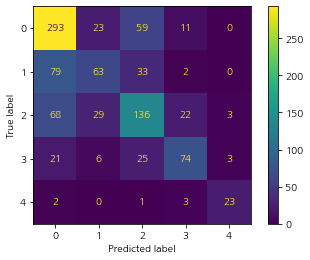

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class_prediction_compi =  np.argmax(predicition_compi, axis= 1)
cm = confusion_matrix(X_test.label, class_prediction_compi, labels=[0, 1, 2, 3, 4])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4])

disp.plot()

## 추가 테스트 데이터 Confusion Matrix

In [35]:
n_class = 5
test_root_path = "/home/Lee_KneeData/"
test_image_path_list = []
test_label_list = []

for label in range(n_class):
    test_image_list = os.listdir(f"{test_root_path}/{label}")
    test_image_path_list += [ f"{test_root_path}/{label}/"+ path for path in test_image_list]
    test_label_list += [label] * len(test_image_list)

df_test = pd.DataFrame({"filepath" : test_image_path_list, "label": test_label_list})
df_test

,filepath,label
0,/home/Lee_KneeData//0/5a21060fe4b0f1e9e5622e32...,0
1,/home/Lee_KneeData//0/5a21060fe4b0f1e9e5622e32...,0
2,/home/Lee_KneeData//0/5a21112ee4b09b69e603db16...,0
3,/home/Lee_KneeData//0/5a21112ee4b09b69e603db16...,0
4,/home/Lee_KneeData//0/5a28d27ae4b028f6846ae00a...,0
...,...,...
526,/home/Lee_KneeData//4/5b0e3cede4b07f99d60ee44d...,4
527,/home/Lee_KneeData//4/5b0f64cde4b0b80049bd1e8e...,4
528,/home/Lee_KneeData//4/5b10dab8e4b07f99d61002a5...,4
529,/home/Lee_KneeData//4/5b10dab8e4b07f99d61002a5...,4


In [36]:
df_test.shape

(531, 2)

## 추가 테스트 데이터 분포

Text(0, 0.5, 'count')

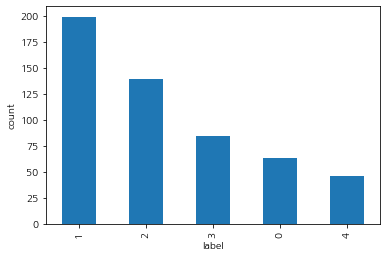

In [37]:
df_test.label.value_counts().plot.bar()
plt.xlabel("label")
plt.ylabel("count")

In [38]:
from sklearn.model_selection import train_test_split

seed = 42
test_da = train_test_split(
    df_test,
    test_size = 0.1,
    random_state = seed,
    stratify = df_test.label
  )

In [39]:
BS = 1
image_size = 224
seed = 42

da_test_generator = valid_aug.flow_from_dataframe(
    dataframe = df_test,
    directory = test_root_path,
    x_col = "filepath",
    y_col = 'label',
    batch_size = 1,
    seed = seed,
    shuffle = False,
    class_mode = None,
    target_size = (image_size, image_size)
  )

Found 531 validated image filenames.


In [40]:
predicition_test = xception_model.predict(da_test_generator, steps= da_test_generator.n/ BS, verbose= 1)

531/531 [==============================] - 5s 9ms/step


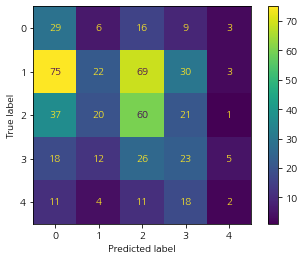

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class_prediction_test =  np.argmax(predicition_test, axis= 1)
cm_test = confusion_matrix(df_test.label, class_prediction_test, labels=[0, 1, 2, 3, 4])
disp_test = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels=[0, 1, 2, 3, 4])

disp_test.plot()

## DPhi에서 제공한 테스트 데이터 세트에 대한 예측 및 .csv파일 생성

In [42]:
test = pd.read_csv(compi_root_path + "Test.csv")

test_generator = valid_aug.flow_from_dataframe(
    dataframe= test,
    directory= compi_root_path + "test",
    x_col= "filename",
    y_col= None,
    batch_size= 1,
    seed= 42,
    shuffle= False,
    class_mode= None,
    target_size= (224,224)
)

STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

Found 1958 validated image filenames.


In [43]:
pred = xception_model.predict(test_generator,steps=STEP_SIZE_TEST,verbose=1)
df_submit = pd.DataFrame({"label":np.argmax(pred, axis= 1)})
df_submit["label"].value_counts()

1958/1958 [==============================] - 18s 9ms/step


0    967
2    517
1    239
3    219
4     16
Name: label, dtype: int64

In [44]:
xception_model.save_weights("knee_xray_Xceptionnet_GPA.h5")
df_submit.to_csv("submission.csv",index=False)